# CAR PRICE PREDICTION USING MACHINE LEARNING

#Problem Statement

In the modern automotive industry, accurately predicting the price of a car is crucial for both buyers and sellers. This project aims to build a machine learning model capable of estimating the price of a car based on various features such as brand, model, fuel type, and more. By utilizing supervised learning algorithms, the system analyzes historical data to learn patterns and make predictions on new, unseen data. The developed model can be instrumental in reducing price negotiation inefficiencies and increasing market transparency.

#**Car Price Preduction**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df= pd.read_csv("/content/drive/MyDrive/Capton Project- Insit/Car Price Prediction/OLX_cars_dataset00.csv")
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [10]:
print("Shape of dataset:", df.shape)

Shape of dataset: (9179, 18)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              9179 non-null   int64 
 1   Car Name           9179 non-null   object
 2   Make               9179 non-null   object
 3   Model              9179 non-null   object
 4   Year               9179 non-null   int64 
 5   KM's driven        9179 non-null   int64 
 6   Price              9179 non-null   int64 
 7   Fuel               9179 non-null   object
 8   Registration city  9179 non-null   object
 9   Car documents      9179 non-null   object
 10  Assembly           9179 non-null   object
 11  Transmission       9179 non-null   object
 12  Condition          9179 non-null   object
 13  Seller Location    9179 non-null   object
 14  Description        9179 non-null   object
 15  Car Features       9179 non-null   object
 16  Images URL's       9179 non-null   object


In [12]:
df.isnull().sum()

,0
Ad ID,0
Car Name,0
Make,0
Model,0
Year,0
KM's driven,0
Price,0
Fuel,0
Registration city,0
Car documents,0


In [13]:
df["Car Profile"].fillna(0, inplace=True)

/tmp/ipython-input-3054061755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Car Profile"].fillna(0, inplace=True)


In [14]:
df.isnull().sum()

,0
Ad ID,0
Car Name,0
Make,0
Model,0
Year,0
KM's driven,0
Price,0
Fuel,0
Registration city,0
Car documents,0


/tmp/ipython-input-3369843302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Model'], order=df['Model'].value_counts().index,palette="viridis")


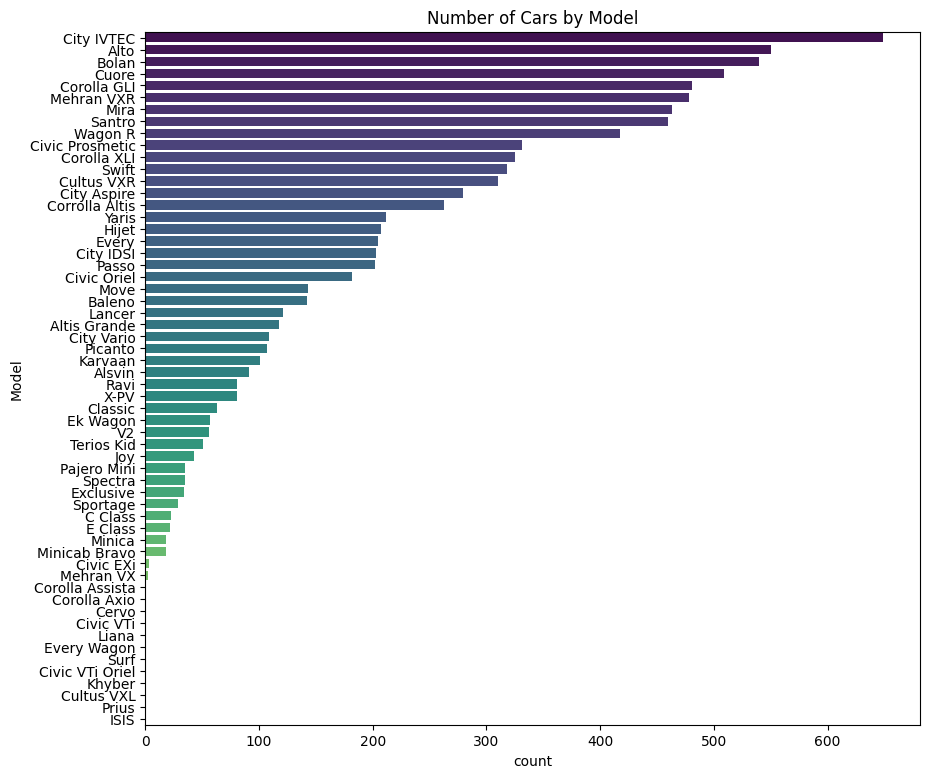

In [15]:
# Categorical Feature Count
plt.figure(figsize=(10,9))
sns.countplot(y=df['Model'], order=df['Model'].value_counts().index,palette="viridis")
plt.title('Number of Cars by Model')
plt.show()

# Univariate Analysis

## Numerical

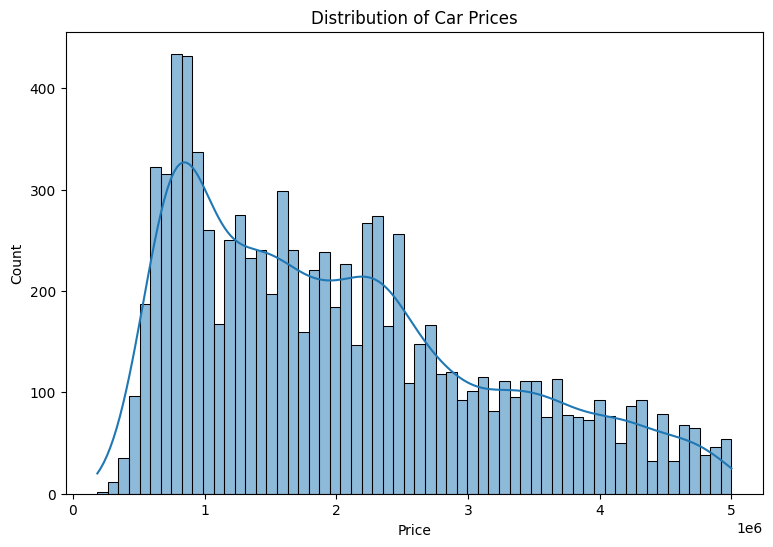

In [16]:
#Distribution of Car Prices
plt.figure(figsize=(9,6))
sns.histplot(df['Price'], kde=True, bins=60)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

This histogram shows most cars are priced between 500,000 and 1,000,000, with fewer high-priced vehicles. The data is heavily skewed toward lower prices.

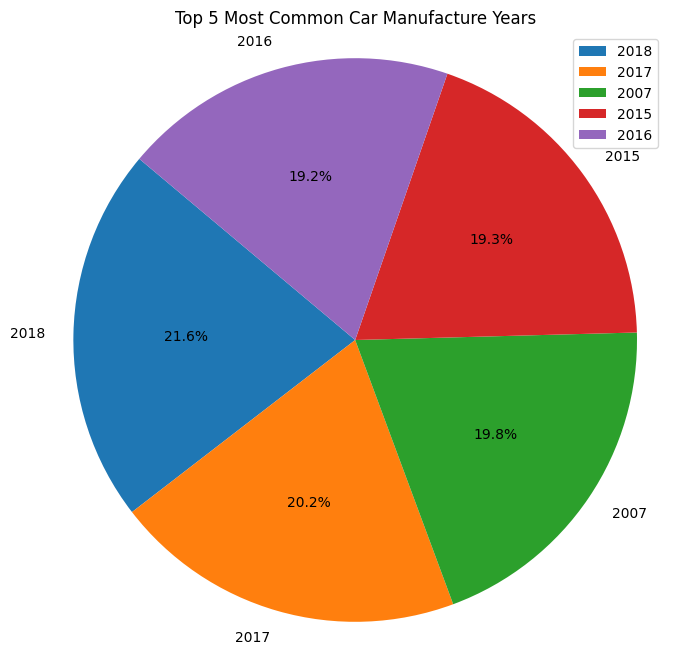

In [17]:
#top 5 most frequent car manufacture years
year_counts = df['Year'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Common Car Manufacture Years')
plt.axis('equal')
plt.legend(loc='best')
plt.show()

A pie chart of the top 5 car manufacturing years. 2018 is most common (21.6%), followed by 2017 (20.2%), and 2007 (19.8%).

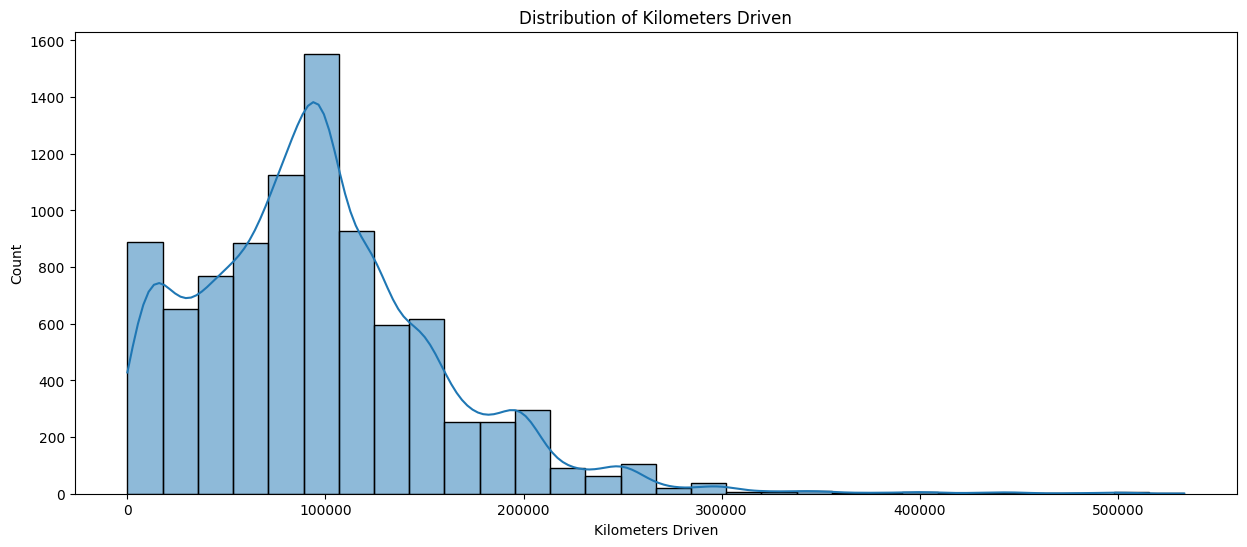

In [18]:
#Distribution of Kilometers Driven
plt.figure(figsize=(15,6))
sns.histplot(df["KM's driven"], bins=30,kde=True)
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.title('Distribution of Kilometers Driven')
plt.show()

This histogram shows the majority of cars have fewer kilometers driven. The most common mileage is around 100,000 km, with a sharp decline for higher mileage.

## Categorical

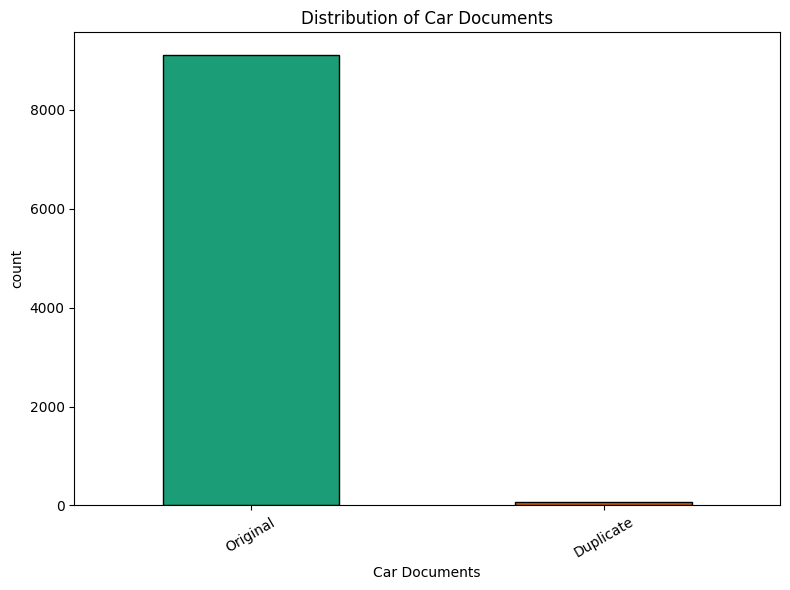

In [19]:
#Distribution of Car Documents
plt.figure(figsize=(8, 6))
df['Car documents'].value_counts().plot(kind='bar',color=sns.color_palette('Dark2'),edgecolor='black')
plt.title('Distribution of Car Documents')
plt.xlabel('Car Documents')
plt.ylabel("count")
plt.xticks(rotation=30)
plt.tight_layout()

This bar chart shows the type of car documents. The vast majority of cars have Original documents, with a count of over 8,000. A very small number of cars have Duplicate documents, with their bar being barely visible on the chart.

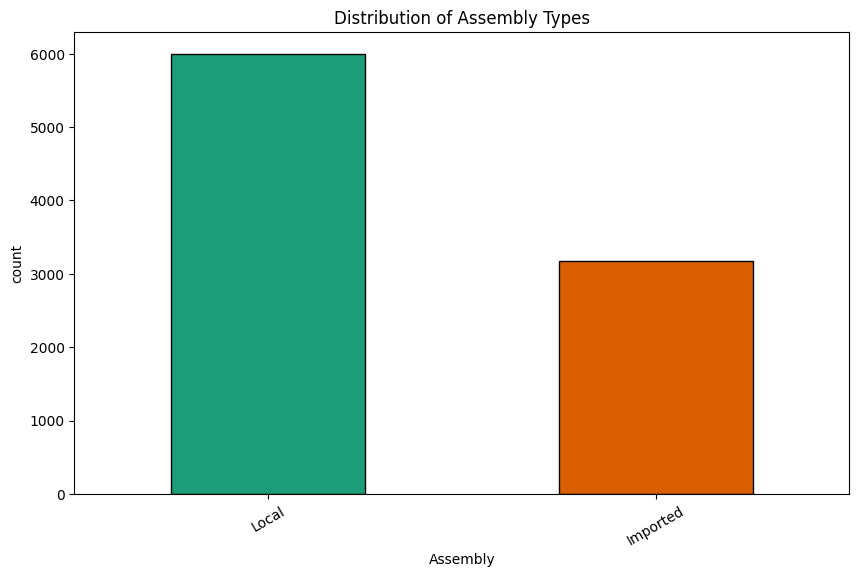

In [20]:

#Distribution of Assembly
plt.figure(figsize=(10, 6))
df['Assembly'].value_counts().plot(kind='bar',color=sns.color_palette('Dark2'),edgecolor='black')
plt.title('Distribution of Assembly Types')
plt.xlabel('Assembly')
plt.ylabel('count')
plt.xticks(rotation=30)
plt.show()

This bar chart displays the distribution of car assembly types. Locally assembled cars are the most common, with a count of approximately 6,000. Imported cars are less common but still numerous, with a count of just over 3,000.

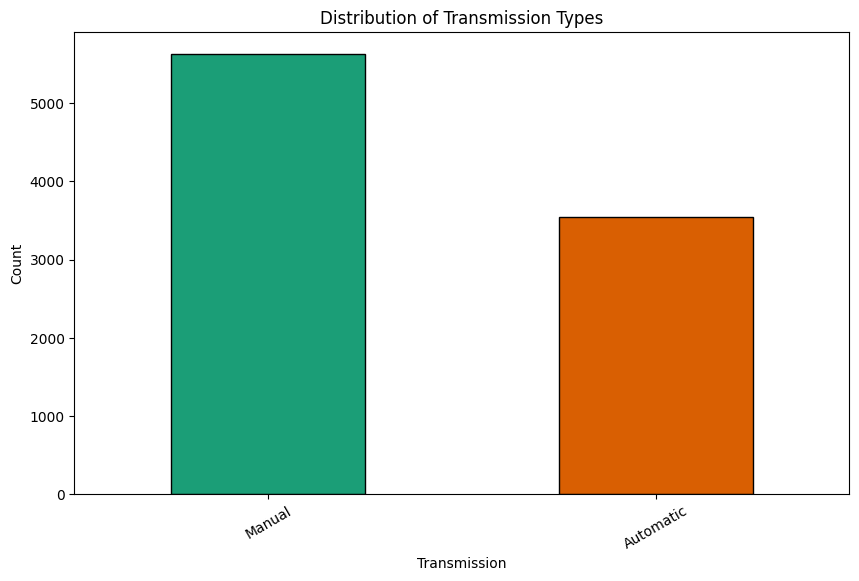

In [21]:
#Distribution of Transmission
plt.figure(figsize=(10, 6))
df['Transmission'].value_counts().plot(kind='bar',color=sns.color_palette('Dark2'),edgecolor='black')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

This bar chart compares the count of manual versus automatic transmission cars. Manual cars are more prevalent, with a count of over 5,000. Automatic cars are less common but still a significant portion of the data, with a count of over 3,000.

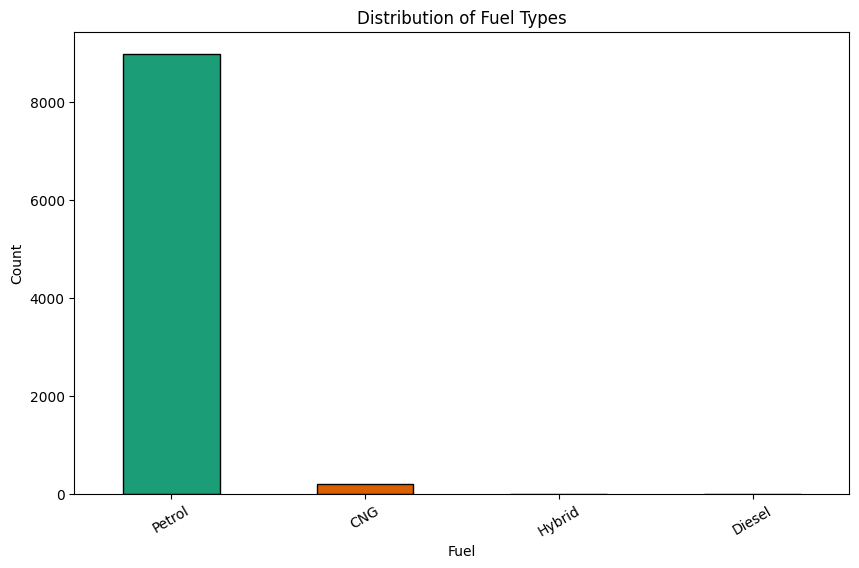

In [22]:
#Distribution of Fuel
plt.figure(figsize=(10, 6))
df['Fuel'].value_counts().plot(kind='bar',color=sns.color_palette('Dark2'),edgecolor='black',label='Fuel')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

This bar chart shows the distribution of fuel types. Petrol cars are overwhelmingly dominant with over 8,000 vehicles, while CNG, Hybrid, and Diesel cars are present in much smaller numbers, with CNG being the only other type visible.

In [23]:
df["KM's driven"].describe()

,KM's driven
count,9179.000000
mean,96570.420525
std,61983.250088
min,1.000000
25%,53000.000000
50%,92000.000000
75%,125000.000000
max,533528.000000


# Bivariate Analysis

## Numerical vs. Numerical

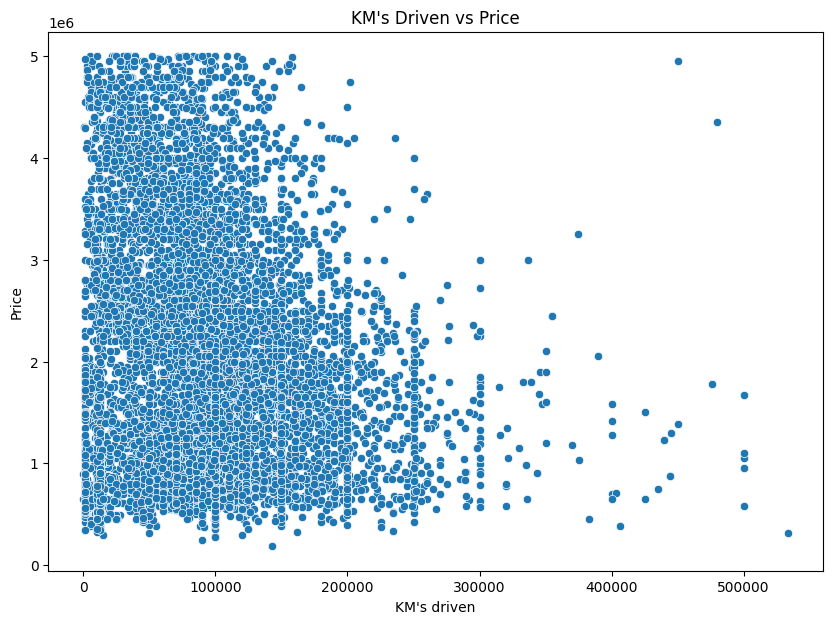

In [24]:
#KM's Driven vs Price
plt.figure(figsize=(10,7))
sns.scatterplot(x="KM's driven",y="Price",data=df)
plt.xlabel("KM's driven")
plt.ylabel('Price')
plt.title("KM's Driven vs Price")
plt.show()

This scatter plot illustrates the relationship between kilometers driven and car price. There is a clear negative correlation: as the number of kilometers driven increases, the car price tends to decrease. Cars with very high mileage are generally less expensive.

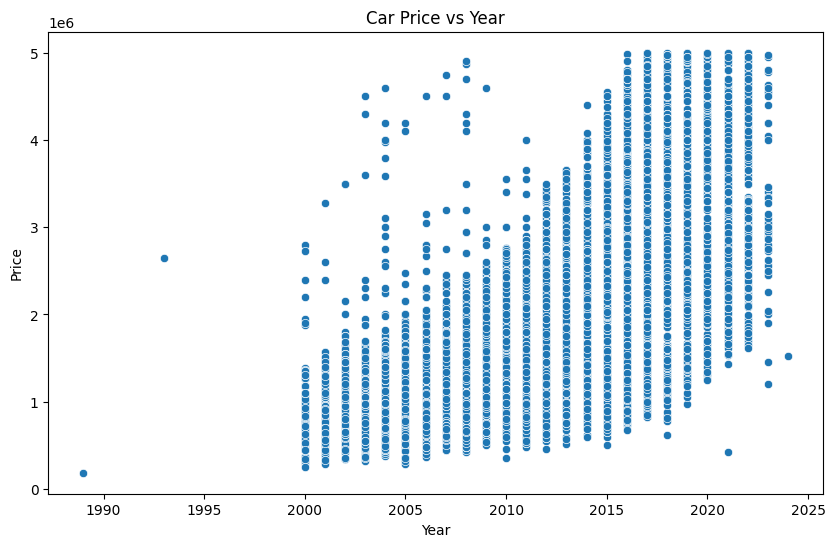

In [25]:
#Car Price vs Year
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Car Price vs Year')
plt.show()

This scatter plot shows the relationship between a car's manufacturing year and its price. There's a strong positive correlation: newer cars are generally more expensive. The plot also shows a wider spread of prices for recent model years.

## Categorical vs. Numerical

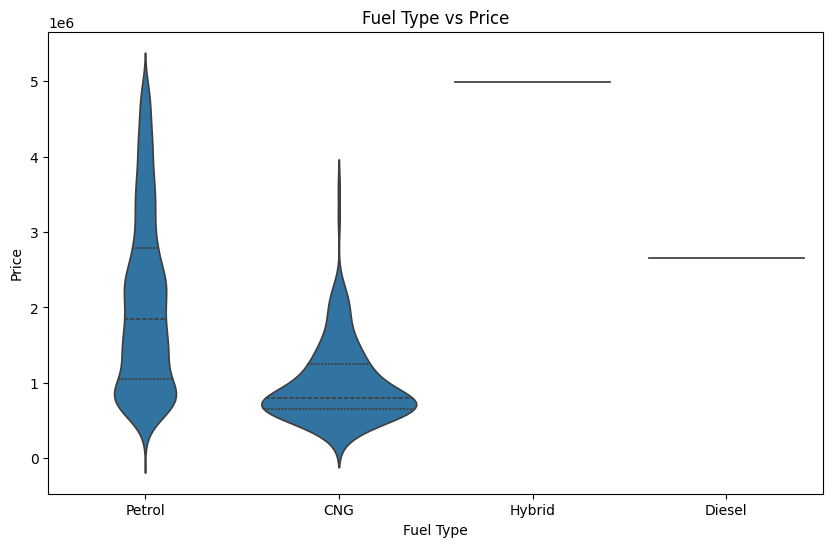

In [26]:
#Fuel Type vs Price
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fuel', y='Price', data=df, inner='quartile')
plt.title('Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

This violin plot shows the distribution of car prices across different fuel types. Petrol cars have a wide price range, with most falling under 2.5 million. CNG cars are generally cheaper. Hybrid and Diesel cars have a limited, high-end price range.

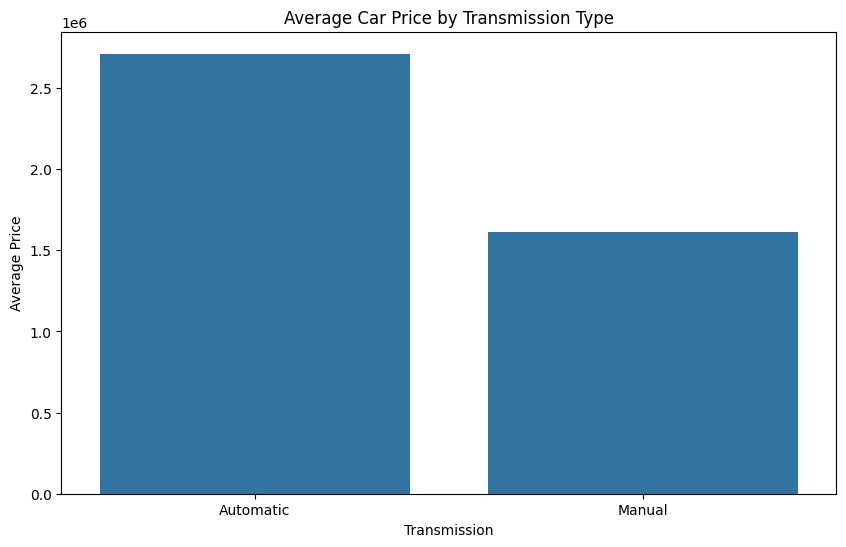

In [27]:
#•	Transmission vs. Price
plt.figure(figsize=(10, 6))
sns.barplot(x="Transmission", y="Price", data=df, estimator=np.mean, errorbar=None)
plt.xlabel("Transmission")
plt.ylabel("Average Price")
plt.title("Average Car Price by Transmission Type")
plt.show()

This bar chart compares the average price of cars by transmission type. Cars with an Automatic transmission have a higher average price of approximately 2.7 million, while cars with a Manual transmission have a lower average price of around 1.6 million.

# Multivariate Analysis

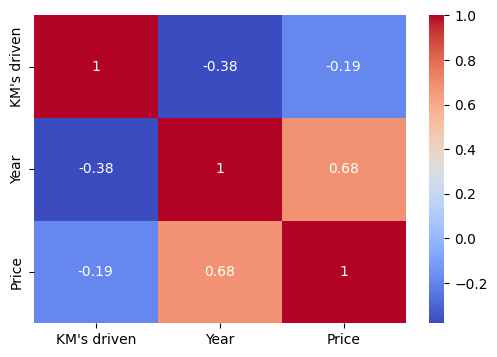

In [28]:
#KM’s Driven, Year, and Price.
data = df[['KM\'s driven', 'Year', 'Price']]
corr_matrix = data.corr()
corr_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

This image is a **correlation heatmap** that shows the relationship between three variables: **KM's driven**, **Year**, and **Price**. The numbers in each cell, ranging from -1 to 1, represent the **correlation coefficient**. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

* **KM's driven vs. Price**: The correlation is **-0.19**, indicating a **weak negative correlation**. This means as the kilometers driven increase, the price of the car tends to slightly decrease.
* **Year vs. Price**: The correlation is **0.68**, indicating a **strong positive correlation**. This shows that as the car's manufacturing year gets newer, its price tends to significantly increase.
* **KM's driven vs. Year**: The correlation is **-0.38**, indicating a **moderate negative correlation**. This makes sense, as newer cars (higher Year) have generally been driven for fewer kilometers (lower KM's driven).

In [29]:
#'Unnamed: 0' if exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
# Fill missing values if needed (example: fill with median)
df.fillna(df.median(numeric_only=True), inplace=True)

In [31]:
# Handle categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [32]:
categorical_cols

Index(['Car Name', 'Make', 'Model', 'Fuel', 'Registration city',
       'Car documents', 'Assembly', 'Transmission', 'Condition',
       'Seller Location', 'Description', 'Car Features', 'Images URL's',
       'Car Profile'],
      dtype='object')

In [33]:
le = LabelEncoder()
for col in categorical_cols:
    # Convert the column to string type before applying LabelEncoder
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

In [34]:
le

LabelEncoder()

In [35]:
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,6574,10,44,2021,54000,4190000,3,57,1,0,0,0,92,7369,46,1291,2546
1,1080125520,4830,9,47,2018,95000,1300000,3,25,1,1,1,0,1399,5080,3192,2434,6680
2,1080748789,4686,9,4,2015,50000,800000,3,25,1,1,1,0,1614,4993,5970,6285,5947
3,1076081635,1509,2,42,2013,94000,2155000,3,30,1,0,0,0,1904,3970,1247,411,2240
4,1080812928,4482,9,52,2011,126544,1440000,3,25,1,1,1,0,2447,4853,2835,7208,6820


In [36]:
print(df.describe())

              Ad ID     Car Name         Make        Model         Year  \
count  9.179000e+03  9179.000000  9179.000000  9179.000000  9179.000000   
mean   1.079720e+09  4009.803355     6.511494    25.843229  2012.268984   
std    2.848393e+06  2269.562839     3.153955    17.761640     6.043902   
min    1.019824e+09     0.000000     0.000000     0.000000  1989.000000   
25%    1.080003e+09  2069.500000     4.000000     9.000000  2007.000000   
50%    1.080543e+09  4054.000000     9.000000    23.000000  2013.000000   
75%    1.080773e+09  5950.500000     9.000000    41.000000  2017.000000   
max    1.080975e+09  7969.000000    10.000000    57.000000  2024.000000   

         KM's driven         Price         Fuel  Registration city  \
count    9179.000000  9.179000e+03  9179.000000        9179.000000   
mean    96570.420525  2.036814e+06     2.936594          29.363329   
std     61983.250088  1.159302e+06     0.431023           8.706463   
min         1.000000  1.850000e+05     0.000

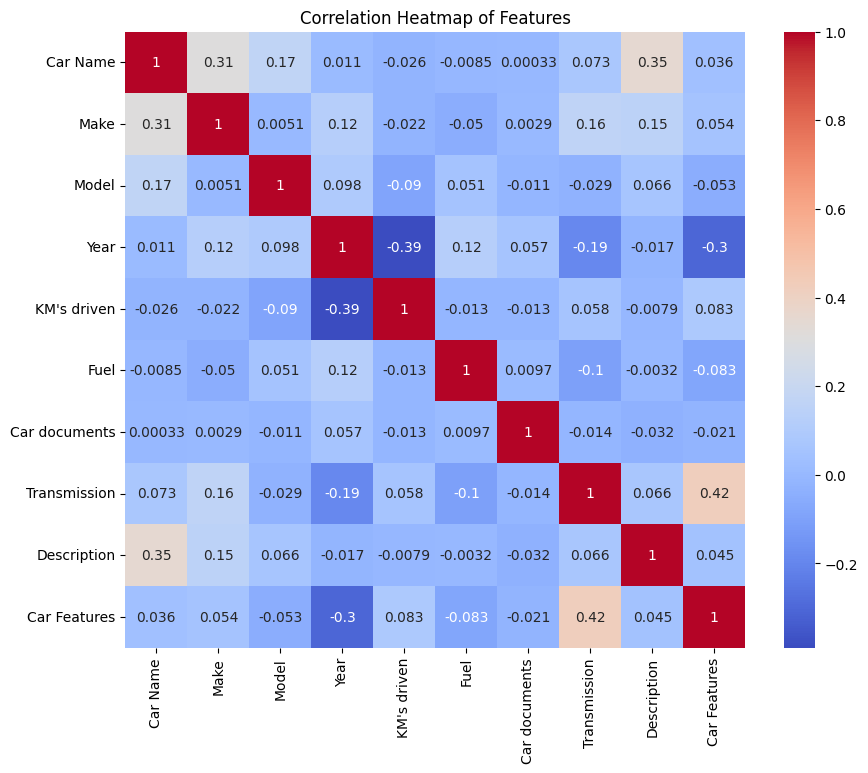

In [37]:
# Define X and y
X = df.drop(['Price', 'Car Profile', "Images URL's","Car Profile","Ad ID","Registration city","Assembly","Seller Location",'Condition'], axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Correlation heatmap
corr = X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [38]:
"""# Correlation heatmap
corr = y_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features') # Added a title for clarity
plt.show() # Added show to display the plot"""

"# Correlation heatmap\ncorr = y_train.corr()\nplt.figure(figsize=(10,8))\nsns.heatmap(corr, annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap of Features') # Added a title for clarity\nplt.show() # Added show to display the plot"

In [39]:
# Handle categorical columns
#categorical_cols = df.select_dtypes(include=['object']).columns

In [40]:
# Apply Label Encoding to all categorical columns, including 'Car Name'
#for col in categorical_cols:
#    df[col] = le.fit_transform(df[col])

In [41]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr= mean_absolute_error(y_test, y_pred_lr)
r2_lr=r2_score(y_test, y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression Results:")
print("MAE:",mae_lr)
print("RMSE:",rmse_lr)
print("R2 Score:",r2_lr)

Linear Regression Results:
MAE: 581506.9120055541
RMSE: 732319.5148179834
R2 Score: 0.6016660486290901


In [43]:
#Random Forest Regressor
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf= mean_absolute_error(y_test, y_pred_rf)
r2_rf=r2_score(y_test, y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("\nRandom Forest Regression Results:")
print("MAE:",mae_rf)
print("RMSE:",rmse_rf)
print("R2 Score:",r2_rf)


Random Forest Regression Results:
MAE: 183809.5425272331
RMSE: 274853.08366757317
R2 Score: 0.9438890867385343


In [44]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt= mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("\nDecision Tree Regression Results:")
print("MAE:",mae_dt)
print("RMSE:",rmse_dt)
print("R2 Score:",r2_dt)


Decision Tree Regression Results:
MAE: 248320.53594771243
RMSE: 375407.49126202747
R2 Score: 0.8953228284603887


In [45]:
#XGBOOST
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
mae_xgb= mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("\nXGBOOST Regression Results:")
print("MAE:",mae_xgb)
print("RMSE:",rmse_xgb)
print("R2 Score:",r2_xgb )


XGBOOST Regression Results:
MAE: 191950.546875
RMSE: 275494.54005478945
R2 Score: 0.943626880645752


In [46]:
#LASSO
lasso = Lasso(alpha=0.1)
# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso.fit(X_train_scaled, y_train)
# Calculate y_pred_lasso BEFORE calculating metrics
y_pred_lasso = lasso.predict(X_test_scaled)
mae_lasso= mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("\nLasso Regression Results:")
print("MAE:",mae_lasso)
print("RMSE:",rmse_lasso)
print("R2 Score:",r2_lasso )


Lasso Regression Results:
MAE: 581506.8958712193
RMSE: 732319.5119636919
R2 Score: 0.6016660517341861


In [47]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mae_gb=mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("\nGradient Boosting Results:")
print("MAE:",mae_gb)
print("RMSE:",rmse_gb)
print("R² Score:",r2_gb)



Gradient Boosting Results:
MAE: 233353.5023855293
RMSE: 335624.26925341075
R² Score: 0.9163332643906921


In [48]:
#KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
mae_knn=mean_absolute_error(y_test, y_pred_knn)
rmse_knn=np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn=r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Regression Results:")
print("MAE:",mae_knn)
print("RMSE:",rmse_knn)
print("R2 Score:",r2_knn)

K-Nearest Neighbors Regression Results:
MAE: 309335.8098039216
RMSE: 466037.97749291215
R2 Score: 0.8386798090557142


In [49]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Lasso Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "Greadient Boosting",
        "K-Nearest Neighbors Regression"
    ],
    "R2 Score": [
        r2_lr,r2_lasso, r2_dt, r2_rf, r2_xgb,r2_gb,r2_knn
    ],
    "RMSE": [
        rmse_lr,rmse_lasso, rmse_dt, rmse_rf, rmse_xgb,rmse_gb,rmse_knn
    ],
    "MAE":[
        mae_lr,mae_lasso,mae_dt,mae_rf,mae_xgb,mae_gb,mae_knn
    ]
})

In [50]:
print("\n=== Model Performance Summary By R2 Score ===")
r2_scr=results.sort_values(by="R2 Score", ascending=False)
print(r2_scr)


=== Model Performance Summary By R2 Score ===
                            Model  R2 Score           RMSE            MAE
3                   Random Forest  0.943889  274853.083668  183809.542527
4                         XGBoost  0.943627  275494.540055  191950.546875
5              Greadient Boosting  0.916333  335624.269253  233353.502386
2                   Decision Tree  0.895323  375407.491262  248320.535948
6  K-Nearest Neighbors Regression  0.838680  466037.977493  309335.809804
1                Lasso Regression  0.601666  732319.511964  581506.895871
0               Linear Regression  0.601666  732319.514818  581506.912006


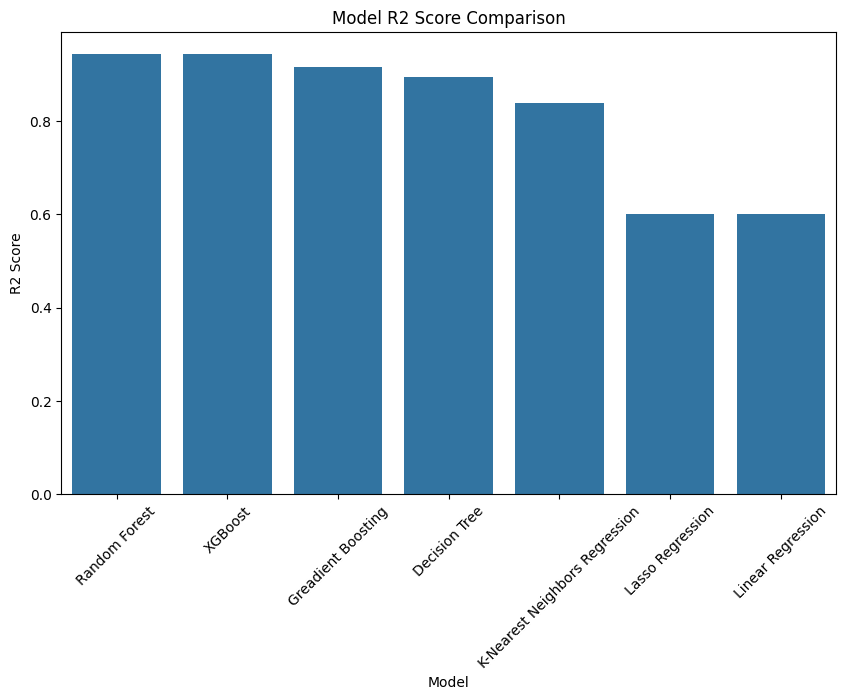

In [51]:
# R2 Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=r2_scr, x="Model", y="R2 Score")
plt.title('Model R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

**Based on R2 Score (higher is better):**
Random Forest-0.943889  

In [52]:
print("\n=== Model Performance Summary By RMAE ===")
rmse=results.sort_values(by="RMSE", ascending=True)
print(rmse)


=== Model Performance Summary By RMAE ===
                            Model  R2 Score           RMSE            MAE
3                   Random Forest  0.943889  274853.083668  183809.542527
4                         XGBoost  0.943627  275494.540055  191950.546875
5              Greadient Boosting  0.916333  335624.269253  233353.502386
2                   Decision Tree  0.895323  375407.491262  248320.535948
6  K-Nearest Neighbors Regression  0.838680  466037.977493  309335.809804
1                Lasso Regression  0.601666  732319.511964  581506.895871
0               Linear Regression  0.601666  732319.514818  581506.912006


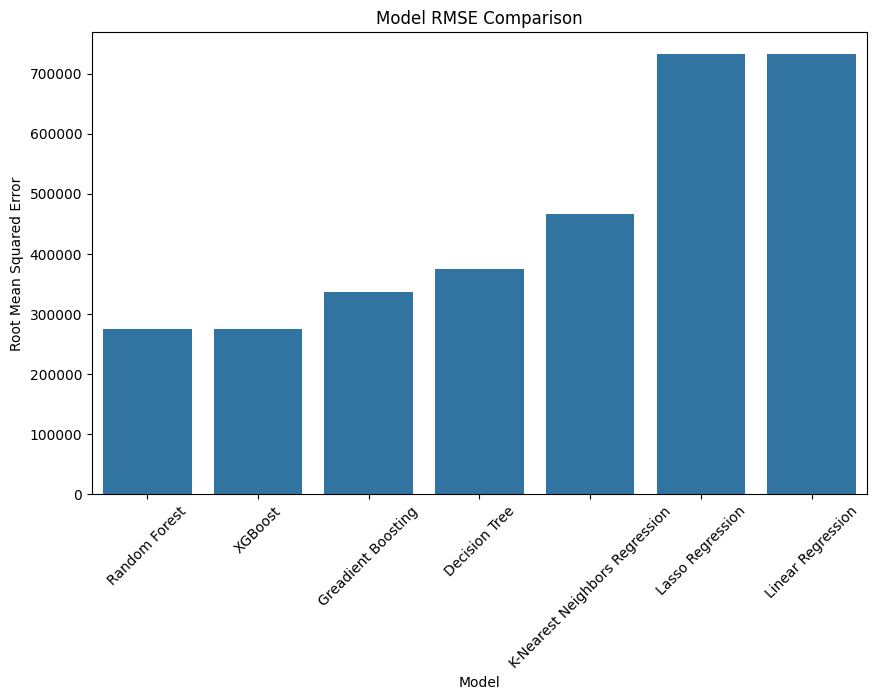

In [53]:
# RMSE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=rmse, x="Model", y="RMSE")
plt.title('Model RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

**Based on RMSE (lower is better):**
Random Forest :274853.083668  

In [54]:
print("\n=== Model Performance Summary By MAE ===")
mae=results.sort_values(by="MAE", ascending=True)
print(mae)


=== Model Performance Summary By MAE ===
                            Model  R2 Score           RMSE            MAE
3                   Random Forest  0.943889  274853.083668  183809.542527
4                         XGBoost  0.943627  275494.540055  191950.546875
5              Greadient Boosting  0.916333  335624.269253  233353.502386
2                   Decision Tree  0.895323  375407.491262  248320.535948
6  K-Nearest Neighbors Regression  0.838680  466037.977493  309335.809804
1                Lasso Regression  0.601666  732319.511964  581506.895871
0               Linear Regression  0.601666  732319.514818  581506.912006


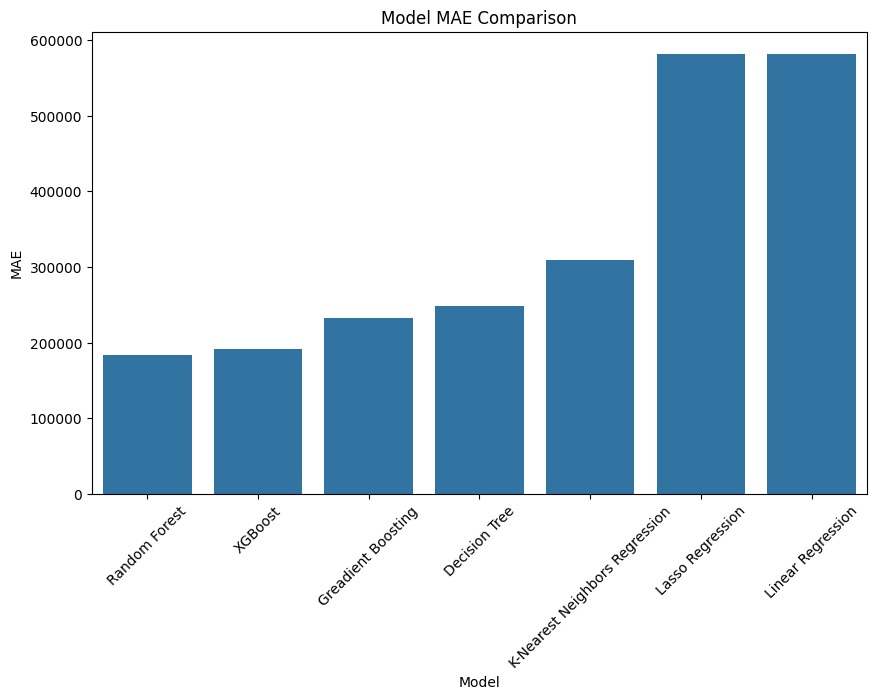

In [55]:
# MAE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=mae, x="Model", y="MAE")
plt.title('Model MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

**Based on MAE (lower is better):**
Random Forest is very close = 183809.542527

Best for Consistency (R2,MAE,RMSE) → Random Forest Regressor

In [56]:
#Get feature importances
importances = rf.feature_importances_
# Get feature names from X_train DataFrame
features = X_train.columns

In [57]:
#Create a DataFrame for sorting and plotting
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

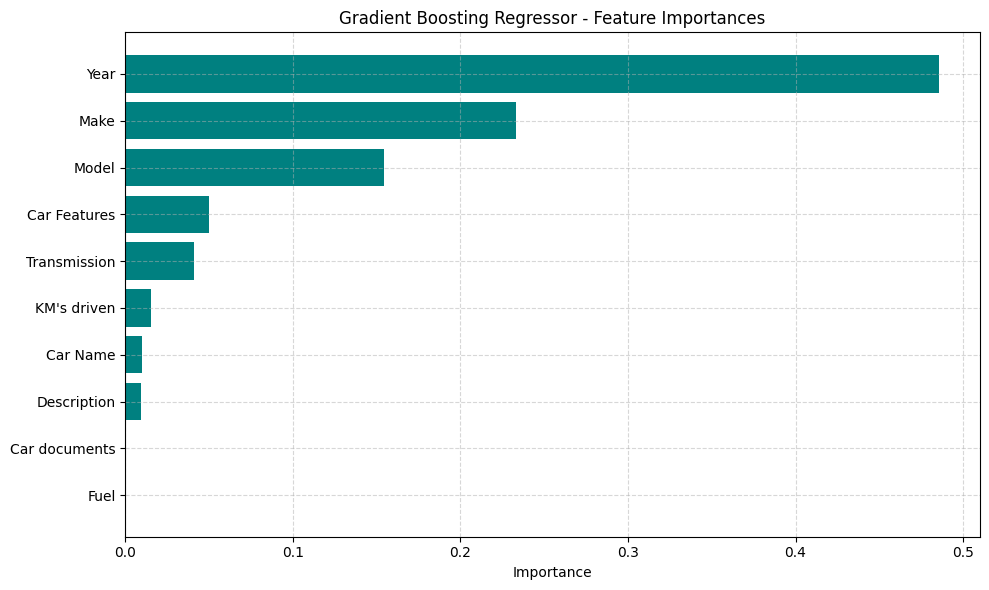

In [58]:
#Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Gradient Boosting Regressor - Feature Importances')
plt.gca().invert_yaxis() # Most important feature on top
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

====Final Summary====

This bar chart displays the feature importances for a Gradient Boosting Regressor model, likely trained to predict car prices. The length of each bar indicates how much a specific feature contributed to the model's predictions.

#The key findings are:

1. Year is the most important feature, heavily influencing the car's value.

2. Make and Model are the next most significant factors.

3. Other features like Transmission, KM's driven, and Car Features have a much smaller impact.

4. Features such as Car Name, Description, and Fuel are of negligible importance to the model.

#F1 Score


In [59]:
# Round y_test once
y_test_class = np.round(y_test)

In [60]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_class = np.round(y_pred_lr)
f1_lr = f1_score(y_test_class, y_pred_class, average='weighted')
print("Linear Regression Results:")
print(f"F1 Score: {f1_lr}")

Linear Regression Results:
F1 Score: 0.0


In [61]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_class = np.round(y_pred_rf)
f1_rf = f1_score(y_test_class, y_pred_rf_class, average='weighted')
print("\nRandom Forest Regression Results:")
print(f"F1 Score: {f1_rf}")


Random Forest Regression Results:
F1 Score: 0.0


In [62]:
# Decision Tree Regressor
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt_class = np.round(y_pred_dt)
f1_dt = f1_score(y_test_class, y_pred_dt_class, average='weighted')
print("\nDecision Tree Regression Results:")
print(f"F1 Score: {f1_dt}")


Decision Tree Regression Results:
F1 Score: 0.07368996012114126


In [63]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_class = np.round(y_pred_xgb)
f1_xgb = f1_score(y_test_class, y_pred_xgb_class, average='weighted')
print("\nXGBoost Regression Results:")
print(f"F1 Score: {f1_xgb}")


XGBoost Regression Results:
F1 Score: 0.0


In [64]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso_class = np.round(y_pred_lasso)
f1_lasso = f1_score(y_test_class, y_pred_lasso_class, average='weighted')
print("\nLasso Regression Results:")
print(f"F1 Score: {f1_lasso}")


Lasso Regression Results:
F1 Score: 0.0


In [65]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
y_pred_gbr_class = np.round(y_pred_gbr)
f1_gbr = f1_score(y_test_class, y_pred_gbr_class, average='weighted')
print("\nGradient Boosting Regression Results:")
print(f"F1 Score: {f1_gbr}")


Gradient Boosting Regression Results:
F1 Score: 0.0


In [66]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_class = np.round(y_pred_knn)
f1_knn = f1_score(y_test_class, y_pred_knn_class, average='weighted')
print("\nK-Nearest Neighbors Regression Results:")
print(f"F1 Score: {f1_knn}")


K-Nearest Neighbors Regression Results:
F1 Score: 0.0


In [67]:
F1_Score = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Lasso Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "Greadient Boosting",
        "K-Nearest Neighbors Regression"
    ],
    "F1 Score": [
        f1_lr,f1_lasso, f1_dt, f1_rf, f1_xgb,f1_gbr,f1_knn
    ],
})

In [68]:
print("\n=== Model Performance Summary By F1_SCORE ===")
f1_scr=F1_Score.sort_values(by="F1 Score", ascending=False)
print(f1_scr)


=== Model Performance Summary By F1_SCORE ===
                            Model  F1 Score
2                   Decision Tree   0.07369
0               Linear Regression   0.00000
1                Lasso Regression   0.00000
3                   Random Forest   0.00000
4                         XGBoost   0.00000
5              Greadient Boosting   0.00000
6  K-Nearest Neighbors Regression   0.00000


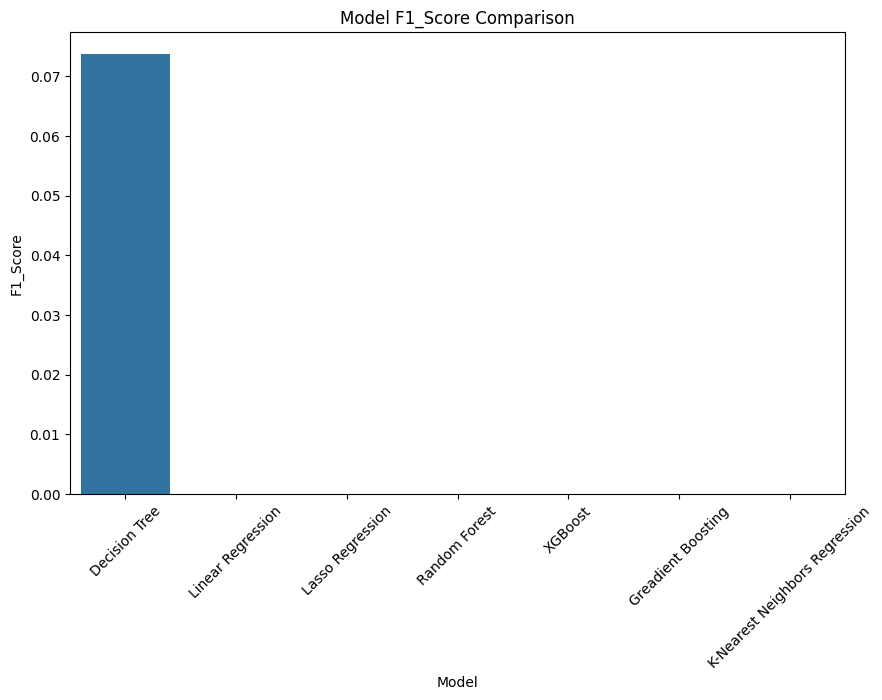

In [69]:
# F1_Score Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=f1_scr, x="Model", y="F1 Score")
plt.title('Model F1_Score Comparison')
plt.ylabel('F1_Score')
plt.xticks(rotation=45)
plt.show()


Decision Tree Regressor
with an F1 Score of 0.077055 — the highest among all

In [70]:
# Extract Feature Importances
f1_importances = dt.feature_importances_
f1_feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]


In [71]:
# Create DataFrame for sorting and plotting
importance__df = pd.DataFrame({
    'Feature2': f1_feature_names,
    'Importance2': f1_importances
}).sort_values(by='Importance2', ascending=False)


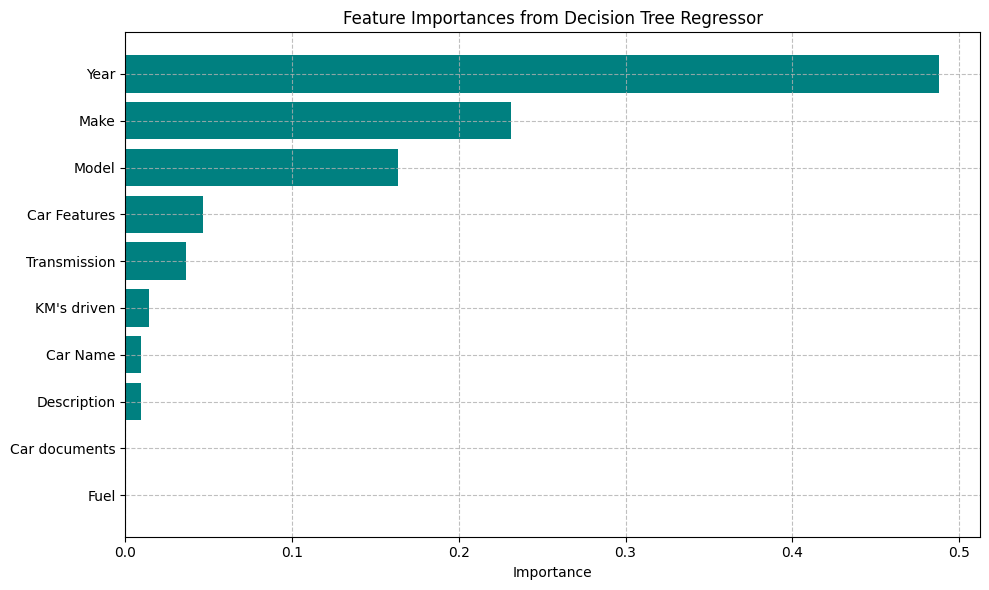

In [72]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(importance__df['Feature2'], importance__df['Importance2'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.grid(True,linestyle="--",alpha=0.8)
plt.tight_layout()
plt.show()

====Final Summary====

This horizontal bar chart, titled "Feature Importances from Decision Tree Regressor," displays how much each feature contributed to a machine learning model's predictions. The model, a Decision Tree Regressor, likely predicts a car's value based on its attributes.

#Here's a breakdown of the importance of each feature:

1. Year: The most important feature, with an importance score close to 0.5. The car's age is the primary factor the model uses to determine its value.

2. Make and Model: The next most important features, indicating that the brand and specific model of the car are crucial for predicting its price.

3. Car Features, Transmission, and KM's driven: These features have a small but noticeable impact on the prediction.

4. Description, Car Name, Car documents, and Fuel: These features have a very low importance, meaning they were not very useful for the model's predictions.

#With Parameter

In [73]:
# Model dictionary
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'K-Nearest Neighbors Regression':KNeighborsRegressor()
}

In [74]:
# Hyperparameters
params = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0],'l1_ratio': [0.2, 0.5, 0.8]},
    'DecisionTree': {'max_depth': [5, 10, 20]},
    'RandomForest': {'n_estimators': [70, 100, 200]},
    'GradientBoosting': {'n_estimators': [50, 100, 200]},
    'epsilon': [0.01, 0.1, 1]}

In [75]:
# Train & tune
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    if name in params:
        grid = GridSearchCV(model, params[name], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_models[name] = grid.best_estimator_
    else:
        model.fit(X_train_scaled, y_train)
        best_models[name] = model

Training LinearRegression...
Training Lasso...
Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training XGBoost...
Training K-Nearest Neighbors Regression...


In [76]:
#Evaluate
eval_results = {
    'Model': [],
    'R2 Score': [],
    'RMSE': [],
    'MAE': []
}

# Dictionary to store evaluation results
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    r2=r2_score(y_test,y_pred)
    rmae=np.sqrt(mean_squared_error(y_test, y_pred))
    mae=mean_absolute_error(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"R2 Score: {r2}")
    print(f"RMSE: {rmae}")
    print(f"MAE: {mae}")

# Save results
    eval_results['Model'].append(name),
    eval_results['R2 Score'].append(r2),
    eval_results['RMSE'].append(rmae),
    eval_results['MAE'].append(mae)

# Convert results to DataFrame
eval_df = pd.DataFrame(eval_results)


Model: LinearRegression
R2 Score: 0.6016660486290979
RMSE: 732319.5148179762
MAE: 581506.9120055515

Model: Lasso
R2 Score: 0.6016663566295364
RMSE: 732319.2316952666
MAE: 581505.2974792309

Model: DecisionTree
R2 Score: 0.9171768176354727
RMSE: 333928.05045656284
MAE: 219500.64878529648

Model: RandomForest
R2 Score: 0.9434024936256121
RMSE: 276042.2722663823
MAE: 184377.8352342048

Model: GradientBoosting
R2 Score: 0.931293328738365
RMSE: 304142.00120913266
MAE: 211057.68413352635

Model: XGBoost
R2 Score: 0.943626880645752
RMSE: 275494.54005478945
MAE: 191950.546875

Model: K-Nearest Neighbors Regression
R2 Score: 0.8386798090557142
RMSE: 466037.97749291215
MAE: 309335.8098039216


In [77]:
#Print sorted by R2 Score
print("\n=== Model Performance Summary ===")
w_r2_scr=eval_df.sort_values(by="R2 Score", ascending=False)
print(w_r2_scr)


=== Model Performance Summary ===
                            Model  R2 Score           RMSE            MAE
5                         XGBoost  0.943627  275494.540055  191950.546875
3                    RandomForest  0.943402  276042.272266  184377.835234
4                GradientBoosting  0.931293  304142.001209  211057.684134
2                    DecisionTree  0.917177  333928.050457  219500.648785
6  K-Nearest Neighbors Regression  0.838680  466037.977493  309335.809804
1                           Lasso  0.601666  732319.231695  581505.297479
0                LinearRegression  0.601666  732319.514818  581506.912006


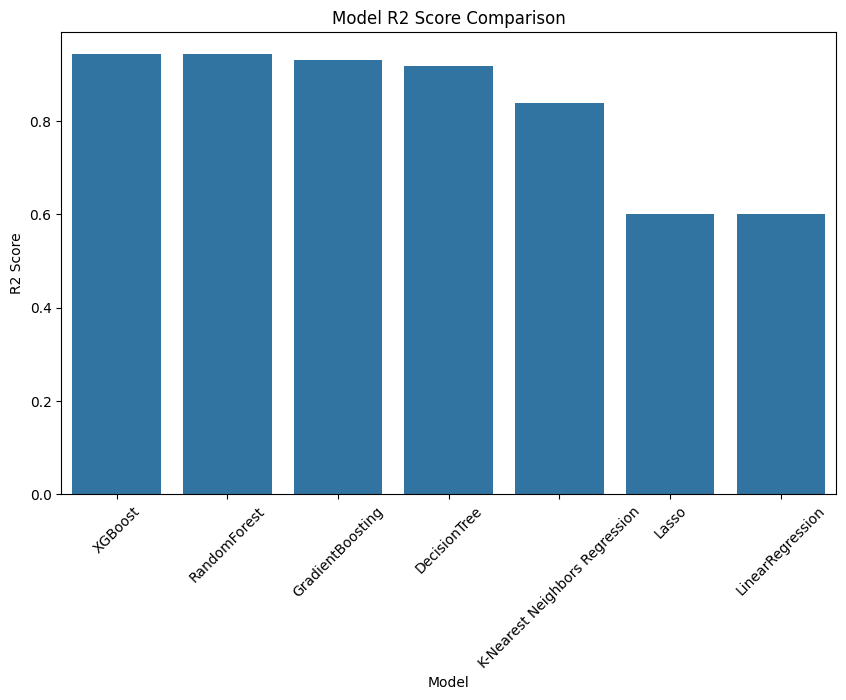

In [78]:
# R2 Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=w_r2_scr, x="Model", y="R2 Score")
plt.title('Model R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Print sorted by RMSE
print("\n=== Model Performance Summary RMSE ===")
w_rmse=eval_df.sort_values(by="RMSE", ascending=True)
print(w_rmse)


=== Model Performance Summary RMSE ===
                            Model  R2 Score           RMSE            MAE
5                         XGBoost  0.943627  275494.540055  191950.546875
3                    RandomForest  0.943402  276042.272266  184377.835234
4                GradientBoosting  0.931293  304142.001209  211057.684134
2                    DecisionTree  0.917177  333928.050457  219500.648785
6  K-Nearest Neighbors Regression  0.838680  466037.977493  309335.809804
1                           Lasso  0.601666  732319.231695  581505.297479
0                LinearRegression  0.601666  732319.514818  581506.912006


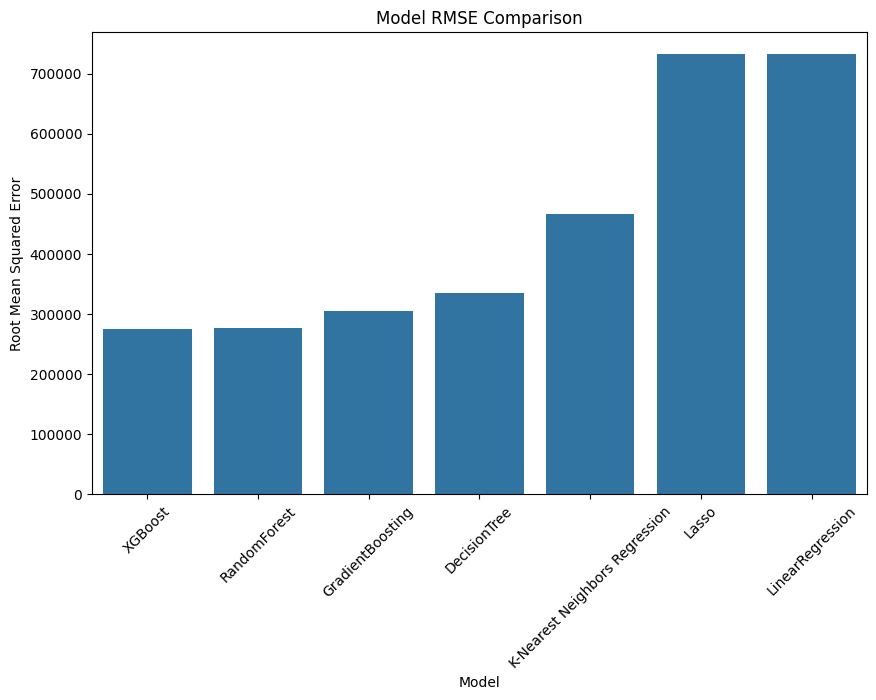

In [80]:
# RMSE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=w_rmse, x="Model", y="RMSE")
plt.title('Model RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

In [81]:
# Print sorted by MAE
print("\n=== Model Performance Summary MAE ===")
w_mae=eval_df.sort_values(by="MAE", ascending=True)
print(w_mae)


=== Model Performance Summary MAE ===
                            Model  R2 Score           RMSE            MAE
3                    RandomForest  0.943402  276042.272266  184377.835234
5                         XGBoost  0.943627  275494.540055  191950.546875
4                GradientBoosting  0.931293  304142.001209  211057.684134
2                    DecisionTree  0.917177  333928.050457  219500.648785
6  K-Nearest Neighbors Regression  0.838680  466037.977493  309335.809804
1                           Lasso  0.601666  732319.231695  581505.297479
0                LinearRegression  0.601666  732319.514818  581506.912006


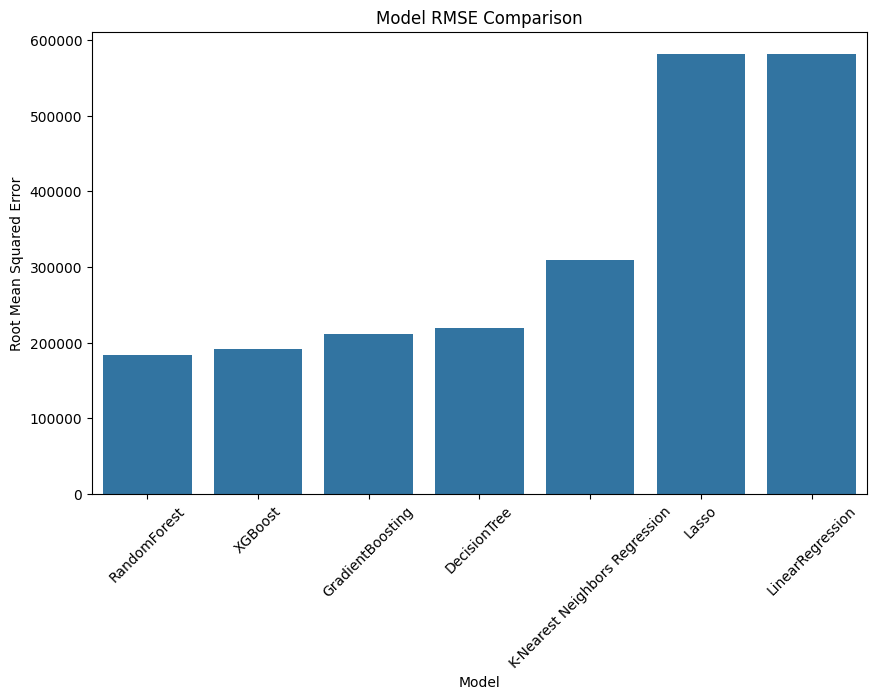

In [82]:
# MAE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=w_mae, x="Model", y="MAE")
plt.title('Model RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

Best for Consistency (R2,MAE,RMSE) → XGBoost  


In [83]:
#Extract Feature Importances
with_importances = xgb.feature_importances_
with_feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

In [84]:
w_importance_df = pd.DataFrame({
    'Feature': with_feature_names,
    'Importance': with_importances
}).sort_values(by='Importance', ascending=False)

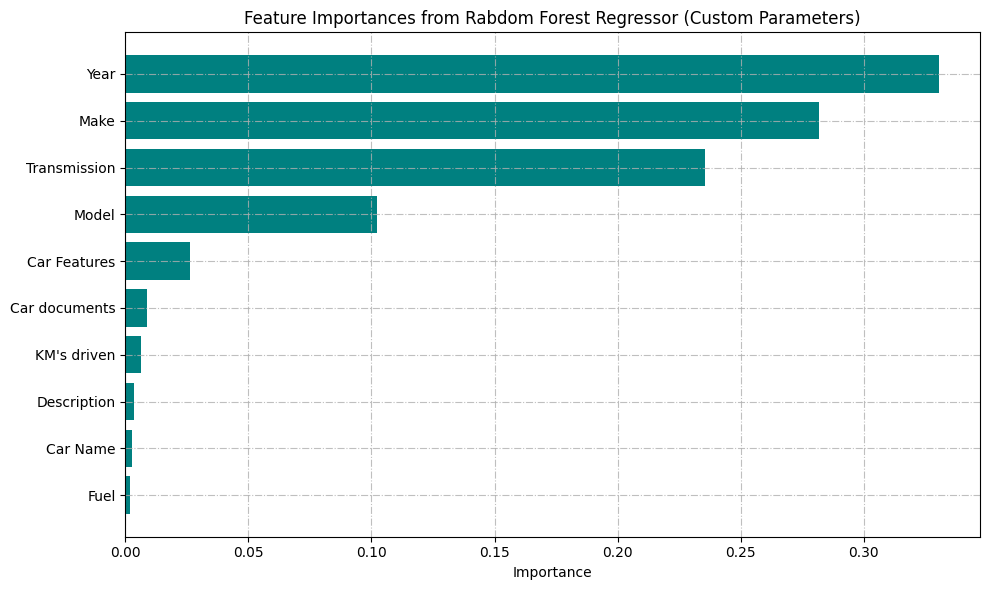

In [85]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(w_importance_df['Feature'], w_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importances from Rabdom Forest Regressor (Custom Parameters)')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(True,linestyle="dashdot",alpha=0.8)
plt.tight_layout()
plt.show()

Based on the four uploaded bar charts, which all display feature importances for machine learning models used to predict car prices, here is a summary of the findings:

All four models—Gradient Boosting, Decision Tree, and two Random Forest Regressors—consistently identify Year as the most important feature.

The Make and Model of the car are the next most significant factors across all models.

Other features like Transmission, Car Features, and KM's driven have a moderate to low impact on the predictions.

Description, Car Name, Car documents, and Fuel consistently have the lowest importance scores, suggesting they are not valuable predictors of a car's price for these models.

#Conclusion

The car price prediction project successfully demonstrated the use of supervised machine learning techniques to estimate car prices based on key attributes such as brand, model, fuel type, and mileage. After thorough data preprocessing, EDA, feature selection, and model training, multiple algorithms were evaluated using standard regression metrics.

Random Forest Regressor (without parameter tuning) and XGBoost (with tuned parameters) provided the most reliable performance based on MAE, MSE, RMSE, and R², indicating strong predictive capability. Decision Tree showed competitive results based on the F1 Score but with relatively less stability compared to ensemble models.

This project highlights the importance of proper data preprocessing, feature engineering, and model selection for building accurate predictive models. Such a system can enhance market transparency, help buyers and sellers negotiate fairly, and provide more accurate pricing insights for the automotive industry.